---
title: Model validity and relevant predictors
teaching: 45
exercises: 2
keypoints:
- "All models are wrong, but some are useful."
- "Before reading into a model's estimated coefficients, modelers must take care to account for essential predictor variables"
- "Models that do not account for essential predictor variables can produce distorted pictures of reality due to omitted variable bias and confounding effects."
objectives:
- "Understand the importance of including relevant predictors in a model."
questions:
- "What are the benfits/costs of including additional predictors in a regression model?"
---

### Model Validity And Interpretation
While using models for predictive purposes only is a completely valid approach (often used in industry), researchers 

With the help of statistical tests and a careful consideration of the phenonemon in study, regression models can help us test the existence of interesting relationships found in nature. 

**How can we rigorously determine if a regression model is detecting meaningful relationships (i.e., non-zero slopes or model coefs) that truly exist?** 

There are three critical questions we must ask before we can read too far into our model's estimations. We will discuss the first in detail throughout this episode.
1. **Accounting for relevant predictors**: Have we included as many relevant predictors in the model as possible?
2. **Regression assumptions**: Does the fitted model follow the 5 assumptions of linear regression?
3. **Bias/variance or under/overfitting**: Does the model capture the variability of the target variable well? Does the model generalize well?

### 1. Relevant predictors

#### EXERCISE_START: Benefits and drawbacks of including all relevant predcitors
What do you think might be some benefits of including all relevant predictors in a model that you intend to use to **explain** relationships? Are there any drawbacks you can think of?
#### EXERCISE_SOLUTION
Including all relevant predictor variables in a model is important for several reasons:

1. **Improving model interpretability**: Leaving out relevant predictors can result in *model misspecification*. Misspecification refers to a situation where the model structure or functional form does not accurately reflect the underlying relationship between the predictors and the outcome. If a relevant predictor is omitted from the model, the coefficients of the remaining predictors may be biased. This occurs because the omitted predictor may have a direct or indirect relationship with the outcome variable, and its effect is not accounted for in the model. Consequently, the estimated coefficients of other predictors may capture some of the omitted predictor's effect, leading to biased estimates.

2. **Improving predicitive accuracy and reducing residual variance**: Omitting relevant predictors can increase the residual variance in the model. Residual variance represents the unexplained variation in the outcome variable after accounting for the predictors in the model. If a relevant predictor is left out, the model may not fully capture the systematic variation in the data, resulting in larger residuals and reduced model fit. While it is true that, in a research setting, we typically care more about being able to interpret our model than being able to perfectly predict the target variable, a model that severely underfits is still a cause for concern since the model won't be capturing the variability of the data well enough to form any conclusions.

3. **Robustness to future changes**: This benefit only applies to predictive modeling tasks where models are often being fit to new data. By including all relevant predictors, the model becomes more robust to changes in the data or the underlying system. If a predictor becomes important in the future due to changes in the environment or additional data, including it from the start ensures that the model is already equipped to capture its influence.

**Drawbacks to including all relevant predictors:** While one should always aim to include as many relevant predictors as possible, this goal needs to be balanced with overfitting concerns. If we include too many predictors in the model and train on a limited number of observations, the model may simply memorize the nuances/noise in the data rather than capturing the underlying trend in the data.
#### EXERCISE_END

#### Example
Let's consider a regression model where we want to evaluate the relationship between FullBath (number of bathrooms) and SalePrice. 

In [1]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto') #
y=housing['target']
X=housing['data']['FullBath']
X.head()

0    2
1    2
2    2
3    1
4    2
Name: FullBath, dtype: int64

It's always a good idea to start by plotting the predictor vs the target variable to get a sense of the underlying relationship.

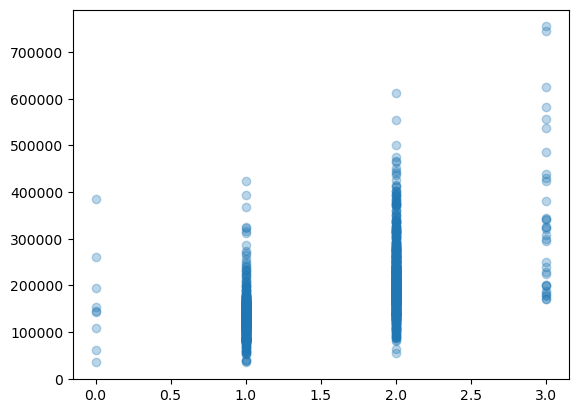

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y,alpha=.3);
# plt.savefig('..//fig//regression//scatterplot_fullBath_vs_salePrice.png', bbox_inches='tight', dpi=300, facecolor='white');

<img src="../fig/regression/scatterplot_fullBath_vs_salePrice.png"  align="center" width="30%" height="30%">

Since the relationship doesn't appear to be quite as linear as we were hoping, we will try a log transformation as we did in the previous episode.

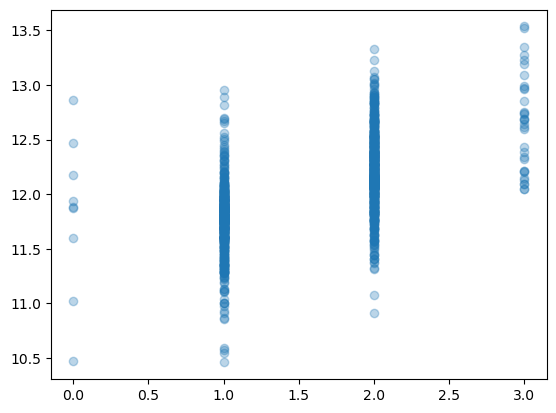

In [3]:
import numpy as np
y_log = y.apply(np.log)
plt.scatter(X,y_log, alpha=.3);
# plt.savefig('..//fig//regression//scatterplot_fullBath_vs_logSalePrice.png', bbox_inches='tight', dpi=300, facecolor='white');

<img src="../fig/regression/scatterplot_fullBath_vs_logSalePrice.png"  align="center" width="30%" height="30%">

The log transform improves the linear relationship substantially! Next, we will import the statsmodels package which is an R-style modeling package that has some convenient functions for rigorously testing and running stats on linear models. 

We'll compare the coefficients estimated from this model to an additional univariate model. To make this comparison more straightforward, we will z-score the predictor. If you don't standardize the scale of all predictors, the coefficient size will be a function of the scale of each specific predictor.

In [4]:
X = (X - X.mean())/X.std()
X.head()

0    0.789470
1    0.789470
2    0.789470
3   -1.025689
4    0.789470
Name: FullBath, dtype: float64

For efficiency, we will skip train/test splits in this episode. Recall that train/test splits aren't as essential when working with only a handful or predictors.

Fit the model.

In [5]:
import statsmodels.api as sm

# Add a constant column to the predictor variables dataframe
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y_log, X)
results = model.fit()

Let's print the coefs from this model. In addition, we can quickly extract R-squared from the statsmodel model object using...

In [6]:
print(results.params)
print('R-squared:', results.rsquared)

const       12.024051
FullBath     0.237582
dtype: float64
R-squared: 0.3537519976399338


Based on the R-squared, this model explains 35.4% of the variance in the SalePrice target variable. 

The model coefficient estimated for the "FullBath" predictor is 0.24. Recall that we fit this model to a log scaled version of the SalePrice. In other words, increasing the FullBath predictor by 1 standard deviation increases the log(SalePrice) by 0.24. While this explanation is completely valid, it is often useful to interpret the coefficient in terms of the original scale of the target variable. 

##### Transforming the coefficient to the original scale of the data.
Exponentiate the coefficient to reverse the log transformation. This gives the multiplicative factor for every one-unit increase in the independent variable. In our model (run code below), for every standard devation increase in the predictor, our target variable increases by a factor of about 1.27, or 27%. Recall that multiplying a number by 1.27 is the same as increasing the number by 27%. Likewise, multiplying a number by, say 0.3, is the same as decreasing the number by 1 – 0.3 = 0.7, or 70%.

In [7]:
np.exp(results.params[1]) # First param is the estimated coef for the y-intercept / "const". The second param is the estimated coef for FullBath.

1.2681792421553808

When transformed to the original data scale, this coefficient tells us that increasing bathroom count by 1 standard deviation increases the sale price, on average, by 27%. While bathrooms are a very hot commodity to find in a house, they likely don't deserve this much credit. Let's do some further digging by comparing another predictor which likely has a large impact on SalePrice — the total square footage of the house (excluding the basement).

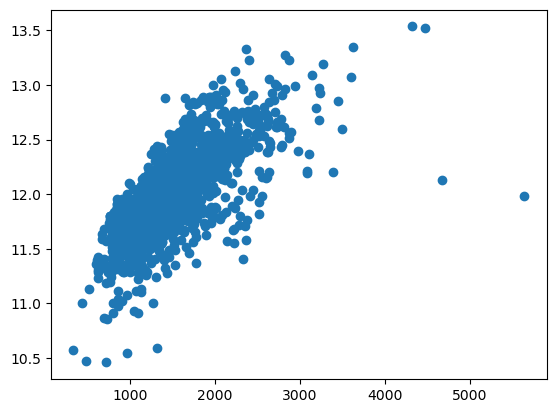

In [8]:
X=housing['data']['GrLivArea']
plt.scatter(X, y_log);
plt.savefig('..//fig//regression//scatterplot_GrLivArea_vs_logSalePrice.png', bbox_inches='tight', dpi=300, facecolor='white');

<img src="../fig/regression/scatterplot_GrLivArea_vs_logSalePrice.png"  align="center" width="30%" height="30%">

As before, we will z-score the predictor. This is a critical step when comparing coefficient estimates since the estimates are a function of the scale of the predictor.

In [9]:
X = (X - X.mean())/X.std()
X.head()

0    0.370207
1   -0.482347
2    0.514836
3    0.383528
4    1.298881
Name: GrLivArea, dtype: float64

Fit the model and print coefs/R-squared.

In [10]:
# Add a constant column to the predictor variables dataframe
X = sm.add_constant(X)
print(X.head())
# Fit the multivariate regression model
model = sm.OLS(y_log, X)
results = model.fit()
print(results.params)
print('R-squared:', results.rsquared)

   const  GrLivArea
0    1.0   0.370207
1    1.0  -0.482347
2    1.0   0.514836
3    1.0   0.383528
4    1.0   1.298881
const        12.024051
GrLivArea     0.279986
dtype: float64
R-squared: 0.49129817224671934


Based on the R-squared, this model explains 49.1% of the variance in the target variable (higher than FullBath which is to be expected). Let's convert the coef to the original scale of the target data before reading into it.

In [11]:
np.exp(results.params[1]) # First param is the estimated coef for the y-intercept / "const". The second param is the estimated coef for FullBath.

1.3231118984358705

For every one standard devation increase in the predictor (GrLivArea), our target variable (SalePrice) increases by a factor of about 1.32, or 32%. 

Let's compare our findings with a multivariate regression model that includes both predictors.

In [12]:
predictors = ['GrLivArea', 'FullBath']
X=housing['data'][predictors]
X.head()

,GrLivArea,FullBath
0,1710,2
1,1262,2
2,1786,2
3,1717,1
4,2198,2


##### Standardization

In [13]:
X = (X - X.mean())/X.std()
X.head()

,GrLivArea,FullBath
0,0.370207,0.789470
1,-0.482347,0.789470
2,0.514836,0.789470
3,0.383528,-1.025689
4,1.298881,0.789470


Add constant for modeling y-intercept

In [14]:
# Fit the multivariate regression model
X = sm.add_constant(X)
X.head()

,const,GrLivArea,FullBath
0,1.0,0.370207,0.789470
1,1.0,-0.482347,0.789470
2,1.0,0.514836,0.789470
3,1.0,0.383528,-1.025689
4,1.0,1.298881,0.789470


In [15]:
model = sm.OLS(y_log, X)
results = model.fit()
print(results.params)
print('R-squared:', results.rsquared)

const        12.024051
GrLivArea     0.216067
FullBath      0.101457
dtype: float64
R-squared: 0.530204241994317


#### EXERCISE_START: Comparing results
1. How does the R-squared of this model compare to the univariate models? Is the variance explained by the multivariate model equal to the sum of R-squared of each univariate model? Why or why not? 
2. Convert the coefficients to the original scale of the target variable as we did earlier in this episode. How much does SalePrice increase with a 1 standard deviation increase in each predictor?
3. How do the coefficient estimates compare to the univariate model estimates? Is there any difference? If so, what might be the cause?

#### EXERCISE_SOLUTION
**How does the R-squared of this model compare to the univariate models? Is the variance explained by the multivariate model equal to the sum of R-squared of each univariate model? Why or why not?**

The R-squared value in the multivariate model (53.0%) is somewhat larger than each of the univariate models (GrLivArea=49.1%, FullBath=35.4%). When we add the R-squared values of the univariate models, we get 49.1 + 35.4 = 84.5%. This value is much larger than what we observe in the multivariate model. The reason we can't simply add the R-squared values together is because each univariate model fails to account for at least one relevant predictor. When we omit one of the predictors, the model assumes the observed relationship is only due to the remaining predictor. This causes the impact of each individual predictor to appear inflated (R-squared and coef magnitude) in the univariate models. 

**Convert the coefficients to the original scale of the target variable as we did earlier in this episode. How much does SalePrice increase with a 1 standard deviation increase in each predictor?**

First we'll convert the coefficients to the original scale of the target variable using the exp() function (the inverse of log).

##### CODE_START
print('GrLivArea:', np.exp(.216))
print('FullBath:', np.exp(.101))
##### CODE_END
##### OUTPUT_START
GrLivArea: 1.2411023790006717
FullBath: 1.1062766417634236
##### OUTPUT_END

Based on these results, increasing the GrLivArea by 1 standard deviation increases SalePrice by 24.1% (univariate = 32.3%), while increasing FullBath by 1 standard deviation increases SalePrice by only 10.6% (univariate = 26.8%). 

**How do the coefficient estimates compare to the univariate model estimates? Is there any difference? If so, what might be the cause?**

When using a multivariate model, the coeficients were reduced to a considerable degree compared to the univariate models. Why does this happen? Both SalePrice and FullBath linearly relate to SalePrice. If we model SalePrice while considering only one of these effects, the model will think that only one predictor is doing the work of multiple predictors. We call this effect *omitted-variable bias* or *omitted-predictor bias*. Omitted-variable bias leads to *model misspecification*, where the model structure or functional form does not accurately reflect the underlying relatioship between the predictors and the outcome. If you want a more truthful model, it is critical that you include as many relevant predictors as possible. This must also be balanced with overfitting concerns. That is, it is often the case that SOME of the relevant predictors must be left out in order to ensure that overfitting does not occur. If we include too many predictors in the model and train on a limited number of observations, the model may simply memorize the nuances/noise in the data rather than capturing the underlying trend in the data.

#### EXERCISE_END

### Other considerations
So far, we've explored the importance of including relevant predictors in a model before we attempt to read too far into the model's estimates. However, recall that there are three critical questions we must ask before we can read too far into our model's estimations
1. **Accounting for relevant predictors**: Have we included all relevant predictors in the model?
2. **Regression assumptions**: Does the fitted model follow the 5 assumptions of linear regression?
3. **Bias/variance or under/overfitting**: Does the model capture the variability of the target variable well? Does the model generalize well?

In the next episode, we'll review a handful of assumptions that must be met prior to running any hypothesis tests on a regression model.